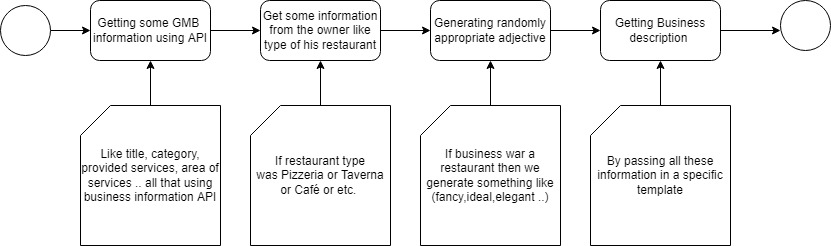

# 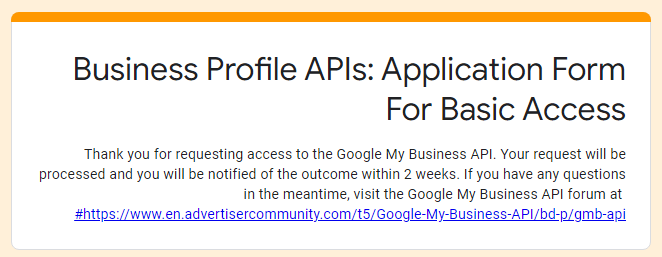

# Part1: Getting information about some GMB account

In [ ]:
'''
Prerequisites:
1. Get your Google Cloud Platform (GCP) project approved.
Fill out this form:
https://docs.google.com/forms/d/1XTQc-QEjsE7YrgstyJxbFDnwmhUhBFFvpNJBw3VzuuE/viewform  
Find out more information here:
https://developers.google.com/my-business/content/prereqs

2. In that approved project, you need to enable two APIs:
My Business Business Information API. There isn’t a typo; ‘business’ is repeated twice.
My Business Account Management API
'''
import sys

from googleapiclient import sample_tools

def main(argv):

    try:
        '''
        Step 1 - Configurations
        '''
        # Use the discovery doc to build two services that we can use to make
        # MyBusiness API (aka Business Profile API) calls, 
        # and authenticate the user so we can access their account
        MyBusinessAccount, flags = sample_tools.init(argv, "mybusinessaccountmanagement", "v1", __doc__, __file__, scope="https://www.googleapis.com/auth/business.manage")
        MyBusinessInformation, flags = sample_tools.init(argv, "mybusinessbusinessinformation", "v1", __doc__, __file__, scope="https://www.googleapis.com/auth/business.manage")

        '''
        Step 2 - Get the account information using the Account Managment API
        https://developers.google.com/my-business/reference/accountmanagement/rest
        '''
        # Build the request to accounts using list method
        request = MyBusinessAccount.accounts().list()

        # Execute the request and print the result
        accounts_result = request.execute()
        print("accounts_result:", accounts_result)
        account_resource_name = accounts_result['accounts'][0]['name']
        print("account_resource_name:",account_resource_name)
        

        '''
        Step 3 - Get the business information using the Business Information API
        Below is the link to the Business Information API
        https://developers.google.com/my-business/reference/businessinformation/rest/v1/accounts.locations/list
        Below is the link to see the fields you can get using this API
        https://developers.google.com/my-business/reference/businessinformation/rest/v1/accounts.locations#Location
        '''
        # List the fields you want to get
        fields_we_want = 'title','categories','storefrontAddress','serviceArea','serviceItems'

        # Build the request to accounts.locations using list method
        request = MyBusinessInformation.accounts().locations().list(
            parent=account_resource_name,
            readMask=fields_we_want
            )

        # Execute the request and print the result
        locations_result = request.execute()
        print("locations_result:")
        print(locations_result)

        # Get the business information
        if locations_result:
            B_title = locations_result['locations'][0]['title'].split('/')[1]
            B_categories = locations_result['locations'][0]['categories'].split('/')[1]
            B_storefrontAddress = locations_result['locations'][0]['storefrontAddress'].split('/')[1]
            B_serviceArea= locations_result['locations'][0]['serviceArea'].split('/')[1]
            B_serviceItems = locations_result['locations'][0]['serviceItems'].split('/')[1]
            
            business_information = [B_title,B_categories,B_storefrontAddress,B_serviceArea,B_serviceItems]
           

        return business_information

    except:
        print('There was an error trying to get Business Information.')

if __name__ == "__main__":
  main(sys.argv)

# Part2: Getting Buisness decription by passing the buisness information in templates

In [ ]:
# The owner of buisness should select the type of his restaurant or his pharmacy

Type_of_Restaurant = ['Bistro','Ethni', 'Fine dining','Teppanyaki-ya','Osteria','Pizzeria','Taverna',
                      'Fast casual','Pop-up','Café','Diner','Ramen-ya','Teahouse','Fast food','Buffet',
                      'Cafeteria','Luncheonette','Tasca','Steakhouse','All you can eat','Kosher',
                      'Dinner in the Sky','Dark','À la carte','Gastropub','Brasserie','Chiringuito',
                      'Food truck','Churrascaria','Food court']
buisness_type = [4] # for example


Type_of_Pharmacy = ['Retail','Hospital','Clinic','Home care','Mail order',
                    'Assisted living','long-term care','Compounding']

buisness_type = [2] # for example

In [ ]:
def Get_Description(business_information,buisness_type):

    
    #business_information is the resulted list of getting information proccess
    #buisness_type is type of restaurant or type of pharmacy, it should be entered by owner
    
    title = business_information[0]
    category = business_information[1]
    address = business_information[2]
    Area = business_information[3]
    Items = business_information[4]
    
    
    if category = 'restaurant':
        Restaurants_Adjectives = ['Decorative','Modern','Casual','Relaxed','Stylish','Friendly',
                                  'Modern','Formal','Simple','Popular',
                                  'Trendy','Elegant','Understated','Lively','ideal','elegant']
        adj = random.choice(Restaurants_Adjectives)  # Can be chosen randomly like here or by owner 
    
    elif category = 'pharmacy':
            Pharmacies_Adjectives = ['Caring', 'compassionate', 'knowledgeable', 'responsive']
            adj = random.choice( Pharmacies_Adjectives) # Can be chosen randomly like here or by owner
    else:
         adj = 'the best choice'
    
    temp_str = '$name is a $adjective $Type $cat in $city . We have been a local favorite for the best $serviceItems in $serviceArea'
    temp_obj = Template(temp_str)
    return temp_obj.substitute(name=title,
                               Type = buisness_type
                               adjective= adj,
                               cat= category,
                               city=address ,
                               serviceArea = Area
                               serviceItems = Items)